# Table of Content
Step 1: Importing the Relevant Libraries

Step 2: Data Inspection

Step 3: Data Cleaning

Step 4: Exploratory Data Analysis

Step 5: Building Model

# Step 1: Importing the Relevant Libraries


In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Step 2: Data Inspection


In [101]:
# importing datasets
train=pd.read_csv("D:\\data science\\job a thon\\train_Df64byy.csv")
test=pd.read_csv("D:\\data science\\job a thon\\test_YCcRUnU.csv")

In [102]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [103]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [104]:
# check missing values in train dataset
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [105]:
# check missing values in test dataset 
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

* in both test and train dataset three variable features has missing values

In [106]:
# check missing values with percentage

train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [107]:
# check values in percentage
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

# * __Step 3: Data Cleaning__


In [108]:
# check target variable distribution
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

* in target variable has imbalanced data

In [109]:

train['City_Code'].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [110]:
test['City_Code'].value_counts()

C1     3789
C2     3331
C3     2065
C4     1559
C9      904
C6      819
C7      788
C8      773
C10     680
C5      599
C17     530
C11     514
C16     478
C15     477
C20     444
C12     442
C13     424
C19     365
C14     343
C18     334
C21     305
C24     270
C23     255
C26     232
C22     197
C25     170
C29     146
C27     142
C28     109
C33     106
C32      80
C34      59
C35      33
C30      23
C36      18
C31       2
Name: City_Code, dtype: int64

In [111]:
train['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [112]:
test['Health Indicator'].value_counts()

X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64

In [113]:
train['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [114]:
test['Holding_Policy_Duration'].value_counts()

14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

In [115]:
train['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [116]:
test['Holding_Policy_Type'].value_counts()

3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64

In [117]:
# check info of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

# Replacing missing values with mode

In [118]:
#For train dataset
train['Health Indicator'].fillna(train['Health Indicator'].mode()[0],inplace=True)
train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0],inplace=True)
train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0],inplace=True)

In [119]:
#For test dataset
test['Health Indicator'].fillna(test['Health Indicator'].mode()[0],inplace=True)
test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0],inplace=True)
test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0],inplace=True)

In [120]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [121]:
# dividing dependent and independent variables
y=train.Response
x=train.drop(["Response","ID","Accomodation_Type"],axis=1)
test=test.drop(["ID","Accomodation_Type"],axis=1)


In [122]:
x.head()

,City_Code,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C3,3213,Individual,36,36,No,X1,14+,3.0,22,11628.0
1,C5,1117,Joint,75,22,No,X2,1.0,3.0,22,30510.0
2,C5,3732,Individual,32,32,No,X1,1.0,1.0,19,7450.0
3,C24,4378,Joint,52,48,No,X1,14+,3.0,19,17780.0
4,C8,2190,Individual,44,44,No,X2,3.0,1.0,16,10404.0


In [123]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

# Statistical Calculations

In [124]:

x.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.662415,15.115188,14183.950069
std,1424.081652,17.310271,17.319375,0.841994,6.340663,6590.074873
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000
25%,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000


# * __Step 4: Exploratory Data Analysis__


# *Handiling Outliers

In [125]:
# Creating a function for outliers
def fun(a):
    q1=a.quantile(0.25)
    q3=a.quantile(0.75)
    iqr=q3-q1
    low=q1-(1.5*iqr)
    high=q3+(1.5*iqr)
    a[a<low]=q1
    a[a>high]=q3
    return a
fun(x['Reco_Policy_Premium'])
fun(test['Reco_Policy_Premium'])


0        11934.0
1        18201.6
2         9240.0
3         9086.0
4        22534.0
          ...   
21800    15884.0
21801    21390.0
21802    17836.0
21803    11568.0
21804    23040.0
Name: Reco_Policy_Premium, Length: 21805, dtype: float64

<AxesSubplot:xlabel='Reco_Policy_Premium'>

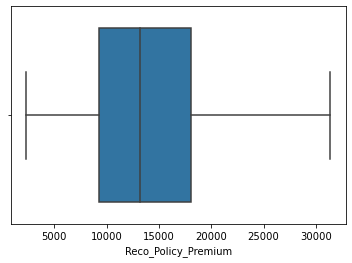

In [126]:
#Checking outliers
sns.boxplot(x['Reco_Policy_Premium'])

<AxesSubplot:xlabel='Response', ylabel='count'>

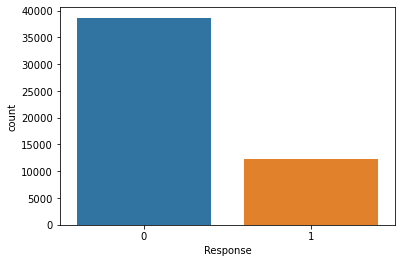

In [127]:
# checking Target distribution 
sns.countplot('Response',data=train)

* By observing this more customers are not Lead 

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

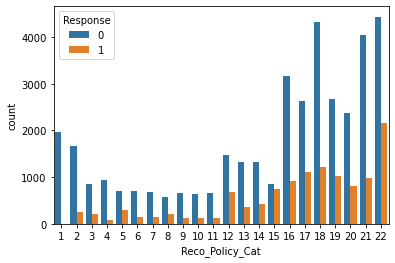

In [128]:
sns.countplot(x='Reco_Policy_Cat',hue='Response',data=train)

* Employes those who belongs to 22 Policy Cat they lead and also from that only more employes are not lead.

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

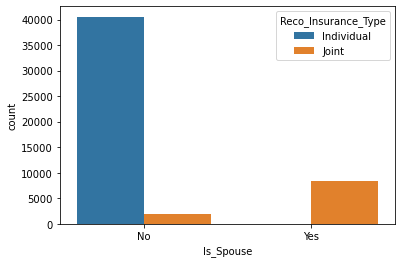

In [129]:
sns.countplot(hue='Reco_Insurance_Type',x='Is_Spouse',data=train)

* All individuals has no Spouse and also some joint has no Spouse

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

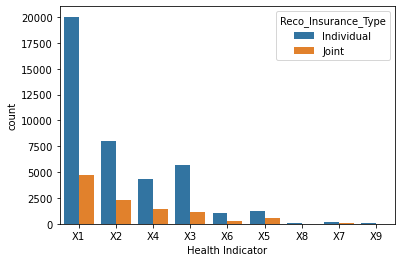

In [130]:
sns.countplot(hue='Reco_Insurance_Type',x='Health Indicator',data=train)

* in X1 health indicator both individual and joint have more than others

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

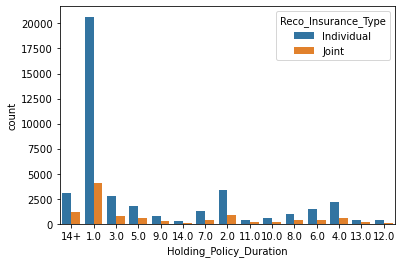

In [131]:
sns.countplot(hue='Reco_Insurance_Type',x='Holding_Policy_Duration',data=train)

* More number of individual and joints will choosen 1.0 year duration policy

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='Holding_Policy_Duration'>

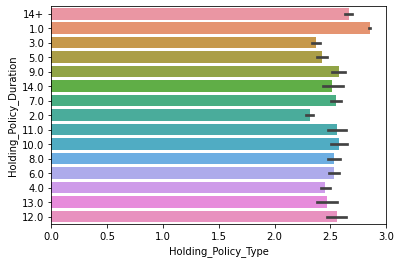

In [132]:
sns.barplot(y='Holding_Policy_Duration',x='Holding_Policy_Type',data=train)

* Mostly employes those who choosen 1.0 Duration policy they prefer the 3.0 policy type

In [133]:
test

,City_Code,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,C4,7,Joint,69,68,Yes,X1,3.0,3.0,18,18201.6
2,C1,564,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,C3,1177,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,C1,951,Individual,75,75,No,X3,14+,3.0,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...
21800,C3,1044,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,C4,266,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,C12,2470,Individual,74,74,No,X3,14+,3.0,1,17836.0
21803,C10,1676,Individual,25,25,No,X4,3.0,1.0,19,11568.0


# * __Step 5: Building Model__


# OneHotEncoding

In [134]:
#import label encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [135]:
x['Reco_Insurance_Type']=le.fit_transform(x['Reco_Insurance_Type'])
x['Is_Spouse']=le.fit_transform(x['Is_Spouse'])
#x['Accomodation_Type']=le.fit_transform(x['Accomodation_Type'])


In [136]:
test['Reco_Insurance_Type']=le.fit_transform(test['Reco_Insurance_Type'])
test['Is_Spouse']=le.fit_transform(test['Is_Spouse'])

In [137]:
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
city=pd.get_dummies(x['City_Code'],drop_first=True)
city_=pd.get_dummies(test['City_Code'],drop_first=True)

In [138]:
health=pd.get_dummies(x['Health Indicator'],drop_first=True)
health_=pd.get_dummies(test['Health Indicator'],drop_first=True)


In [139]:
duration=pd.get_dummies(x['Holding_Policy_Duration'],drop_first=True)
duration_=pd.get_dummies(test['Holding_Policy_Duration'],drop_first=True)


In [140]:
policy_type=pd.get_dummies(x['Holding_Policy_Type'],drop_first=True)
policy_type_=pd.get_dummies(test['Holding_Policy_Type'],drop_first=True)


In [141]:
policy_type.columns=['2.00','3.00','4.00']
policy_type.columns_=['2.00','3.00','4.00']

In [142]:
cat=pd.get_dummies(x['Reco_Policy_Cat'],drop_first=True)
cat_=pd.get_dummies(test['Reco_Policy_Cat'],drop_first=True)

In [143]:
#region=pd.get_dummies(x['Region_Code'],drop_first=True)

In [145]:
x.head()

,City_Code,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C3,3213,0,36,36,0,X1,14+,3.0,22,11628.0
1,C5,1117,1,75,22,0,X2,1.0,3.0,22,30510.0
2,C5,3732,0,32,32,0,X1,1.0,1.0,19,7450.0
3,C24,4378,1,52,48,0,X1,14+,3.0,19,17780.0
4,C8,2190,0,44,44,0,X2,3.0,1.0,16,10404.0
...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,0,22,22,0,X3,1.0,3.0,18,7704.0
50878,C5,4188,0,27,27,0,X3,7.0,3.0,4,5408.0
50879,C1,442,0,63,63,0,X2,14+,1.0,12,11374.0
50880,C1,4,1,71,49,0,X2,2.0,2.0,16,28179.2


In [146]:
# dropping columns
x.drop(x.columns[[0,5,6,7]], axis = 1, inplace = True) 
test.drop(test.columns[[0,5,6,7]], axis = 1, inplace = True) 


In [147]:
# Concatenate the dataframes
x=pd.concat([city,health,duration,policy_type,cat,x],axis=1)
test=pd.concat([health_,city_,duration_,policy_type_,cat_,test],axis=1)

In [ ]:
x.head()

In [149]:
x.describe()

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,20,21,22,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,...,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,0.031661,0.022542,0.017059,0.019752,0.014661,0.023309,0.022307,0.022778,0.015664,0.017668,...,0.062439,0.098797,0.129751,1732.788707,0.203333,44.856275,42.738866,2.662415,15.115188,13924.224897
std,0.175099,0.148441,0.129493,0.139147,0.120194,0.150884,0.147680,0.149197,0.124172,0.131744,...,0.241953,0.298392,0.336033,1424.081652,0.402482,17.310271,17.319375,0.841994,6.340663,6087.761892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,16.000000,1.000000,1.000000,2280.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,523.000000,0.000000,28.000000,27.000000,2.000000,12.000000,9248.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1391.000000,0.000000,44.000000,40.000000,3.000000,17.000000,13178.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2667.000000,0.000000,59.000000,57.000000,3.000000,20.000000,18096.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6194.000000,1.000000,75.000000,75.000000,4.000000,22.000000,31365.000000


# Handling imbalance data

In [150]:
x.head()

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,20,21,22,Region_Code,Reco_Insurance_Type,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3213,0,36,36,3.0,22,11628.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1117,1,75,22,3.0,22,30510.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3732,0,32,32,1.0,19,7450.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4378,1,52,48,3.0,19,17780.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2190,0,44,44,1.0,16,10404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,845,0,22,22,3.0,18,7704.0
50878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4188,0,27,27,3.0,4,5408.0
50879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,442,0,63,63,1.0,12,11374.0
50880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,1,71,49,2.0,16,28179.2


In [151]:
y.head()

0        0
1        0
2        1
3        0
4        0
        ..
50877    0
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 50882, dtype: int64

In [152]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE as sm
smote=sm(sampling_strategy='minority')

In [153]:
x,y=smote.fit_resample(x,y)

In [154]:
y.value_counts()

1    38673
0    38673
Name: Response, dtype: int64

# normalisation of data

In [155]:
x=(x-x.min())/(x.max()-x.min())
test=(test-test.min())/(test.max()-test.min())

# splitting the data into train and test

In [156]:
# importing train_test_split method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)

# ML MODELS

In [157]:
#importing methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

In [163]:
# Creating the Function


algos = [LogisticRegression(),RandomForestClassifier(n_estimators=50,criterion='entropy'),SVC(kernel='poly'),GaussianNB(),XGBClassifier(max_depth=80),
          KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=5, n_neighbors=5,weights='uniform'), DecisionTreeClassifier(criterion = "gini",random_state = 200,max_depth=1000, min_samples_leaf=250)]

names = ['Logistic Regression','random forest','svm','gaussian','xgboost',
         'K Neighbors Regressor', 'Decision Tree Regressor']

roc =[]


In [164]:
# building a model
score=0
for name in (algos):
    model = name
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    roc.append(score)
   


[23:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [165]:
evaluation = pd.DataFrame({'Model': names,
                           'roc_auc_score': roc})
evaluation

,Model,roc_auc_score
0,Logistic Regression,0.826955
1,random forest,0.824370
2,svm,0.829153
3,gaussian,0.721008
4,xgboost,0.826115
5,K Neighbors Regressor,0.793730
6,Decision Tree Regressor,0.805171


* Among all the classification models 'SVM' will got the more accuracy_score and roc_auc_score .

# final model

* Building final model with SVM algorithm

In [170]:
submission = pd.read_csv('D:\\data science\\job a thon\\sample_submission_QrCyCoT.csv')
model=SVC(kernel='poly')


In [172]:
model.fit(x_train,y_train)


SVC(kernel='poly')

In [173]:
# prediction to test data 
final_predictions = model.predict(test)
submission['Response'] = final_predictions


In [2]:
#save the file
submission.to_csv('submissionfi.csv', index=False)

NameError: name 'submission' is not defined